<a href="https://colab.research.google.com/github/grarizki/fpl-preseason-data/blob/main/FPL_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [ ]:
r = requests.get(url)


In [ ]:
json = r.json()


In [ ]:
json.keys()


dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
elements_df.head()


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,80201,0,0,0,0,0,1,3.5,None,0,Bernd,0.0,1,False,,None,50,80201.jpg,3.7,Leno,2.0,False,None,a,1,3,131,0,0,0,0,0.0,26.2,Leno,3131,0,0,11,37,1,1,0,0,1,86,11,625,702.2,0.0,2.0,70.3,41,11,408,40,316,4,193,12,NaN,,NaN,,NaN,
1,NaN,None,115918,0,0,0,0,0,1,2.0,None,0,Rúnar Alex,0.0,2,False,,None,40,115918.jpg,1.0,Rúnarsson,1.1,False,None,a,1,3,1,0,0,0,0,0.0,0.2,Rúnarsson,15,0,0,0,0,0,0,0,0,0,2,0,8,16.6,0.0,0.0,1.7,340,29,334,15,327,11,345,30,NaN,,NaN,,NaN,
2,NaN,None,47431,0,0,0,0,0,3,3.2,None,0,Willian,0.0,3,False,,None,65,47431.jpg,3.1,Borges Da Silva,0.2,False,None,a,1,3,78,0,0,0,0,0.0,12.0,Willian,1398,1,7,3,17,0,0,0,0,0,0,9,306,256.2,534.8,228.0,102.3,217,95,48,35,144,84,122,70,1.0,,2.0,,NaN,
3,NaN,None,54694,0,0,0,0,0,4,4.2,None,0,Pierre-Emerick,0.0,4,False,,None,100,54694.jpg,4.5,Aubameyang,2.8,False,None,a,1,3,131,0,0,0,0,0.0,13.1,Aubameyang,2330,10,3,10,26,1,0,0,2,0,0,11,358,493.8,361.5,823.0,167.4,121,18,89,12,32,16,50,18,NaN,,NaN,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,2.6,None,0,Cédric,0.0,5,False,,None,45,58822.jpg,2.8,Soares,0.4,False,None,a,1,3,28,0,0,0,0,0.0,6.2,Cédric,744,0,1,2,11,0,0,0,1,0,0,3,125,110.8,114.8,66.0,29.2,289,104,202,49,258,84,285,96,NaN,,5.0,,NaN,


In [ ]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]


In [ ]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
slim_elements_df.head()


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,1,1,2.0,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,1,1,1.1,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,1,3,0.2,65,1398,0,12.0,78,Midfielder
3,Aubameyang,1,4,2.8,100,2330,0,13.1,131,Forward
4,Soares,1,2,0.4,45,744,0,6.2,28,Defender


In [ ]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
slim_elements_df.head()


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,Arsenal,1,2.0,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,Arsenal,1,1.1,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,Arsenal,3,0.2,65,1398,0,12.0,78,Midfielder
3,Aubameyang,Arsenal,4,2.8,100,2330,0,13.1,131,Forward
4,Soares,Arsenal,2,0.4,45,744,0,6.2,28,Defender


In [ ]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
slim_elements_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
29,Martínez,Aston Villa,1,39.3,55,3420,0,33.8,186,Goalkeeper,33.8
208,Dallas,Leeds,3,16.1,55,3410,0,31.1,171,Midfielder,31.1
219,Meslier,Leeds,1,5.6,50,3150,0,30.8,154,Goalkeeper,30.8
410,Cresswell,West Ham,2,20.2,55,3170,0,27.8,153,Defender,27.8
38,Targett,Aston Villa,2,11.2,50,3404,0,27.6,138,Defender,27.6
145,Guaita,Crystal Palace,1,6.9,45,3330,0,27.6,124,Goalkeeper,27.6
352,Lloris,Spurs,1,5.4,55,3420,0,27.1,149,Goalkeeper,27.1
256,Santana de Moraes,Man City,1,7.5,60,3240,0,26.7,160,Goalkeeper,26.7
266,Harrison,Man City,3,3.1,60,2846,0,26.7,160,Midfielder,26.7
407,Fabianski,West Ham,1,3.0,50,3150,0,26.6,133,Goalkeeper,26.6


In [ ]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


,position,value
0,Defender,10.621656
1,Forward,9.227273
2,Goalkeeper,10.865909
3,Midfielder,9.935789


In [ ]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]


In [ ]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


In [ ]:
pivot.sort_values('value',ascending=False)


,position,value
2,Goalkeeper,14.940625
0,Defender,13.896667
3,Midfielder,12.179355
1,Forward,12.083333


In [ ]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()


In [ ]:
team_pivot.sort_values('value',ascending=False)


,team,value
10,Man City,15.865000
1,Aston Villa,15.611111
15,West Ham,14.426316
7,Leeds,14.372222
6,Everton,14.178947
8,Leicester,13.755000
2,Brighton,13.575000
4,Chelsea,13.303704
16,Wolves,13.210526
0,Arsenal,12.940909


In [ ]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

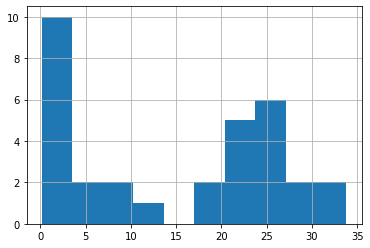

In [ ]:
goal_df.value.hist()


In [ ]:
goal_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
29,Martínez,Aston Villa,1,39.3,55,3420,0,33.8,186,Goalkeeper,33.8
219,Meslier,Leeds,1,5.6,50,3150,0,30.8,154,Goalkeeper,30.8
145,Guaita,Crystal Palace,1,6.9,45,3330,0,27.6,124,Goalkeeper,27.6
352,Lloris,Spurs,1,5.4,55,3420,0,27.1,149,Goalkeeper,27.1
256,Santana de Moraes,Man City,1,7.5,60,3240,0,26.7,160,Goalkeeper,26.7
407,Fabianski,West Ham,1,3.0,50,3150,0,26.6,133,Goalkeeper,26.6
426,dos Santos Patrício,Wolves,1,1.4,50,3330,0,26.4,132,Goalkeeper,26.4
0,Leno,Arsenal,1,2.0,50,3131,0,26.2,131,Goalkeeper,26.2
111,Pope,Burnley,1,7.2,55,2880,0,26.2,144,Goalkeeper,26.2
181,Schmeichel,Leicester,1,8.2,50,3420,0,25.6,128,Goalkeeper,25.6


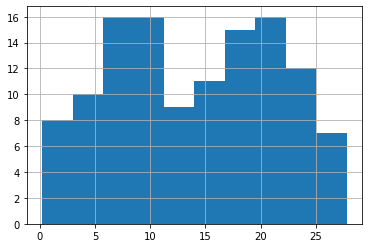

In [ ]:
def_df.value.hist()


In [ ]:
def_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
410,Cresswell,West Ham,2,20.2,55,3170,0,27.8,153,Defender,27.8
38,Targett,Aston Villa,2,11.2,50,3404,0,27.6,138,Defender,27.6
287,Wan-Bissaka,Man Utd,2,11.1,55,3060,0,26.2,144,Defender,26.2
80,Dunk,Brighton,2,6.6,50,2932,0,26.0,130,Defender,26.0
37,Mings,Aston Villa,2,6.4,50,3194,0,25.6,128,Defender,25.6
417,Coufal,West Ham,2,20.3,50,3054,0,25.6,128,Defender,25.6
168,Keane,Everton,2,2.0,50,2989,0,25.4,127,Defender,25.4
44,Konsa Ngoyo,Aston Villa,2,1.6,50,3195,0,23.8,119,Defender,23.8
261,Gato Alves Dias,Man City,2,24.7,60,2843,0,23.7,142,Defender,23.7
428,Coady,Wolves,2,7.7,45,3303,0,23.6,106,Defender,23.6


In [ ]:
mid_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
208,Dallas,Leeds,3,16.1,55,3410,0,31.1,171,Midfielder,31.1
266,Harrison,Man City,3,3.1,60,2846,0,26.7,160,Midfielder,26.7
421,Soucek,West Ham,3,9.5,60,3420,0,24.5,147,Midfielder,24.5
340,Ward-Prowse,Southampton,3,7.5,65,3420,0,24.0,156,Midfielder,24.0
358,Son,Spurs,3,10.6,100,3119,0,22.8,228,Midfielder,22.8
31,Traoré,Aston Villa,3,1.9,60,2315,0,22.5,135,Midfielder,22.5
419,Bowen,West Ham,3,1.3,65,2556,0,21.7,141,Midfielder,21.7
364,Højbjerg,Spurs,3,2.2,50,3420,0,21.4,107,Midfielder,21.4
249,Gündogan,Man City,3,4.2,75,2025,0,20.9,157,Midfielder,20.9
159,Eze,Crystal Palace,3,0.2,60,2555,0,20.8,125,Midfielder,20.8


In [ ]:
slim_elements_df.to_csv('fpl_data.csv')
files.download('fpl_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>